# Machine Learning with IBM Minor Project
##### by - Manav Verma
### Using Zomato dataset, we can find interesting insights pertaining to geography, restaurant type, and rating can be generated. Use Python to perform the EDA (explanatory Data analysis) and perfom below task.

## Importing all necesary libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Sample how the dataset looks like.

In [99]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [100]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## 2. Check if Duplicates Data.

In [101]:
print(df.duplicated().any())

True


In [102]:
df.drop_duplicates(inplace = True)

## 3. Perform null values treatments and cleaning data.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51609 non-null  object
 1   online_order                 51609 non-null  object
 2   book_table                   51609 non-null  object
 3   rate                         43854 non-null  object
 4   votes                        51609 non-null  int64 
 5   location                     51588 non-null  object
 6   rest_type                    51382 non-null  object
 7   cuisines                     51564 non-null  object
 8   approx_cost(for two people)  51265 non-null  object
 9   listed_in(type)              51609 non-null  object
 10  listed_in(city)              51609 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


In [107]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [108]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

0

In [109]:
df.dropna(inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [110]:
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

Quick Bites                   14981
Casual Dining                  9859
Cafe                           3487
Dessert Parlor                 1923
Delivery                       1775
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

In [111]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

Bakery                        775
Beverage Shop                 700
Bar                           650
Food Court                    523
Bar, Casual Dining            406
                             ... 
Bakery, Food Court              2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Dessert Parlor, Kiosk           2
Quick Bites, Kiosk              1
Name: rest_type, Length: 80, dtype: int64

In [112]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
        
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()
        

Quick Bites           14981
Casual Dining          9859
others                 8853
Cafe                   3487
Dessert Parlor         1923
Delivery               1775
Takeaway, Delivery     1452
Casual Dining, Bar     1117
Name: rest_type, dtype: int64

## 4. Visualizing the locations as per the order.

<AxesSubplot:xlabel='location'>

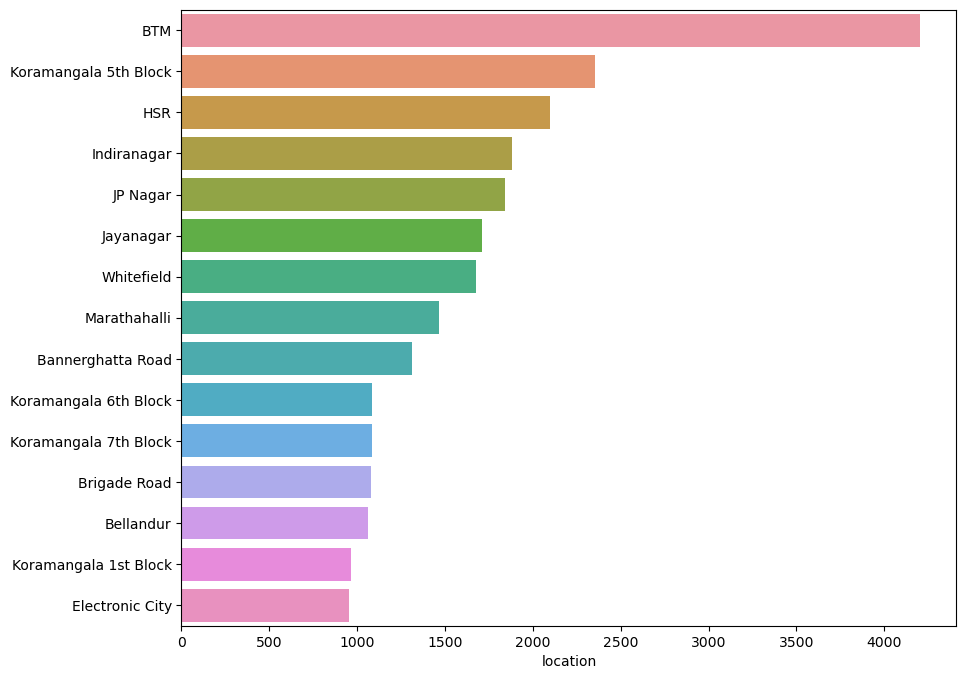

In [52]:
locations = df.location.value_counts().head(15)
locations

plt.figure(figsize = (10, 8))
sns.barplot(x = locations, y = locations.index)

## 5. Visualize the online and offline order.

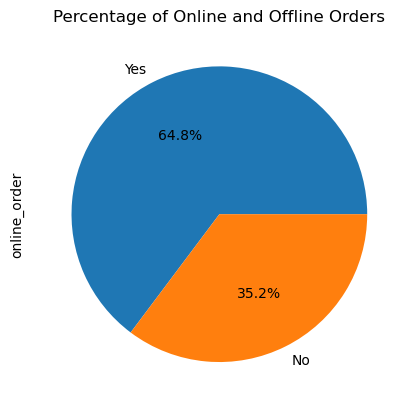

In [53]:
order_type = df.online_order.value_counts()

order_type.plot(kind="pie", autopct="%1.1f%%")
plt.title("Percentage of Online and Offline Orders")
plt.show()

## 6. Visualize the table booking.

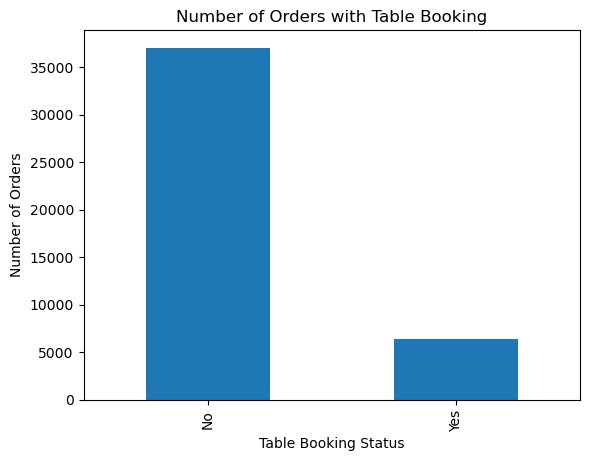

In [68]:
table_booking = df.book_table.value_counts()

table_booking.plot(kind="bar")
plt.xlabel("Table Booking Status")
plt.ylabel("Number of Orders")
plt.title("Number of Orders with Table Booking")
plt.show()

## 7. Visualize Online Order Facility in the Location Wise.

In [56]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order         No   Yes
location                     
BTM                1176  3025
Banashankari        308   495
Banaswadi           184   298
Bannerghatta Road   442   870
Basavanagudi        207   421
...                 ...   ...
West Bangalore        3     2
Whitefield          661  1016
Wilson Garden        78   125
Yelahanka             0     4
Yeshwantpur          21    91

[92 rows x 2 columns]

<AxesSubplot:xlabel='location'>

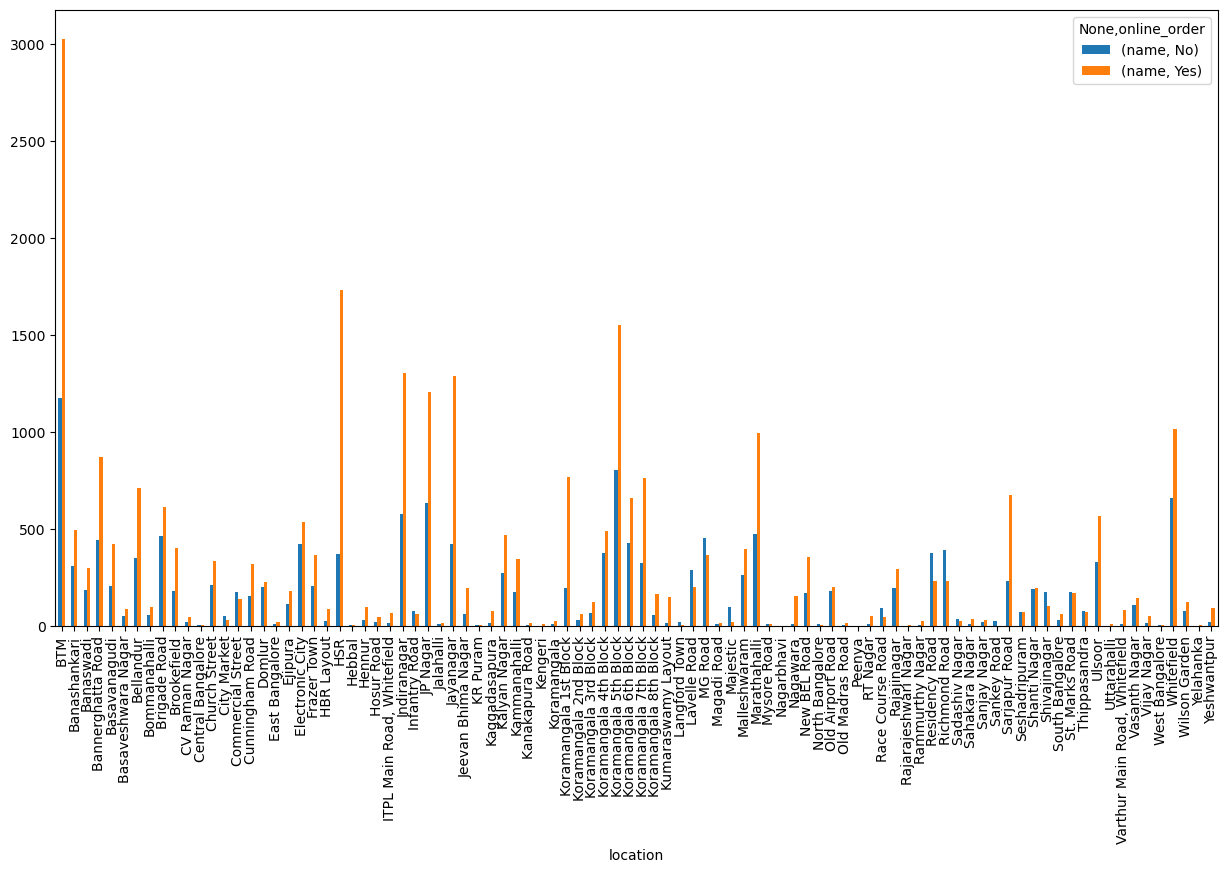

In [57]:
df1.plot(kind = 'bar', figsize = (15,8))

## 8. Visualize Restaurant VS Rate.

In [105]:
df_grouped.fillna(df_grouped.mean(), inplace=True)

<AxesSubplot:xlabel='rest_type', ylabel='rate'>

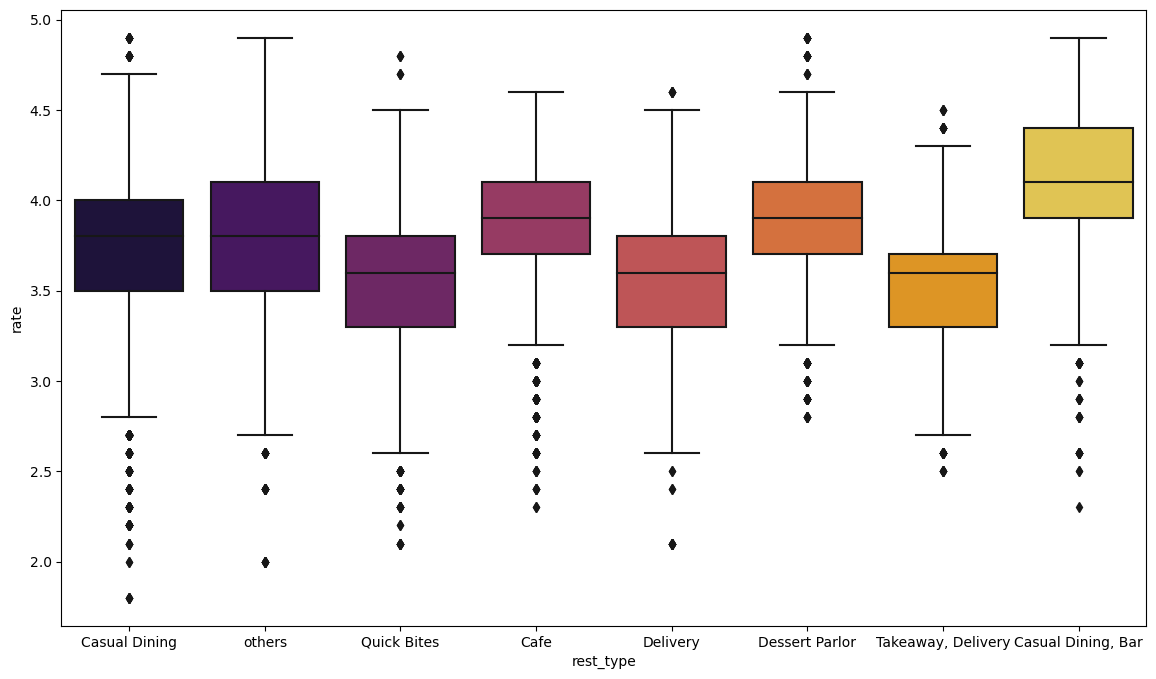

In [115]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'rest_type', y = 'rate', data = df, palette = 'inferno')

## 9. Compare the outliers.

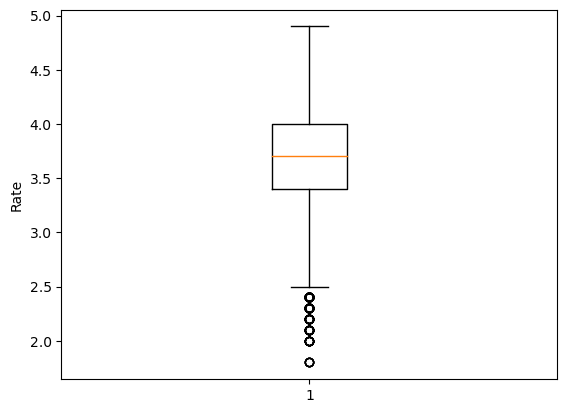

In [118]:
plt.boxplot(df['rate'])
plt.ylabel("Rate")
plt.show()

In [119]:
df['rate'].describe()

count    43447.000000
mean         3.701731
std          0.428349
min          1.800000
25%          3.400000
50%          3.701731
75%          4.000000
max          4.900000
Name: rate, dtype: float64

## 10. Conclude your dataset with your assumptions.

1. The 17 variables in the dataset were all taken from the Zomato website. The dataset includes information on 51,717 restaurants in Bengaluru that were recorded as of March 15, 2019.

2. BTM is home to the vast majority of the dataset's restaurants, with a smaller proportion in other cities. This might mean that BTM is a well-liked eating destination.

3. Quick bites restaurants are the most frequent type in the dataset, followed by casual dining. This might suggest that quick bites is the most easily available restaurant type

4. Bars and casual dining restaurants consistently receive the highest ratings.

5. The dataset also reveals that people actually prefer placing online orders to visiting restaurants.